<a href="https://colab.research.google.com/github/ConorSaund/UCDPA_conorsaunders/blob/main/UCDPA_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://raw.githubusercontent.com/ConorSaund/UCDPA_conorsaunders/main/Sleep_Efficiency.csv'
df = pd.read_csv(url)

In [18]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [19]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64

In [20]:
# Count the number of non-null values under the "Gender" header
gender_count = df['Gender'].count()

# Show the distribution of Male and Female
gender_distribution = df['Gender'].value_counts()

print("Number of non-null values under 'Gender' header: ", gender_count)
print("Distribution of Male and Female: ")
print(gender_distribution)

Number of non-null values under 'Gender' header:  452
Distribution of Male and Female: 
Male      228
Female    224
Name: Gender, dtype: int64


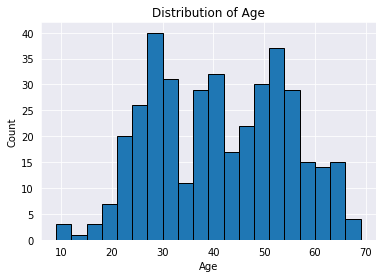

<Figure size 432x288 with 0 Axes>

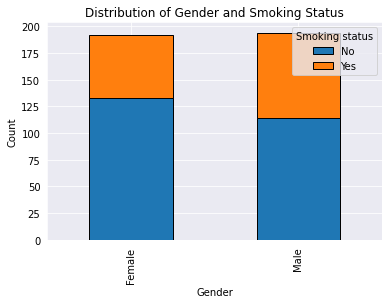

<Figure size 432x288 with 0 Axes>

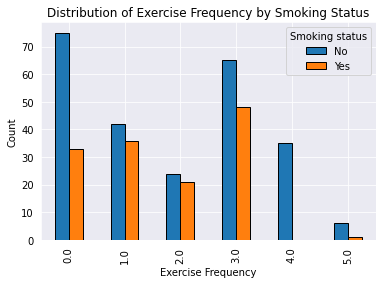

In [39]:
# create a bar plot for Age
plt.figure()
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# create a stacked bar plot for Gender and Smoking status
plt.figure()
grouped = df.groupby(['Gender', 'Smoking status']).size().unstack()
grouped.plot(kind='bar', stacked=True, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender and Smoking Status')

# create a grouped bar plot for Exercise frequency
plt.figure()
grouped = df.groupby(['Exercise frequency', 'Smoking status']).size().unstack()
grouped.plot(kind='bar', edgecolor='black')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')
plt.title('Distribution of Exercise Frequency by Smoking Status')

plt.show()

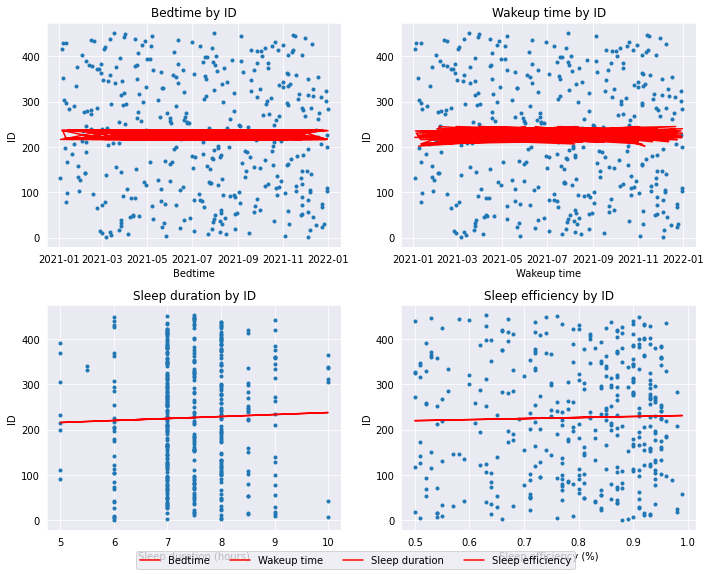

In [41]:
# Convert bedtime and wakeup time columns to datetime objects
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

# Create line plots for bedtime, wakeup time, sleep duration, and sleep efficiency
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(df['Bedtime'], df['ID'], '.')
axs[0, 0].set_xlabel('Bedtime')
axs[0, 0].set_ylabel('ID')

axs[0, 1].plot(df['Wakeup time'], df['ID'], '.')
axs[0, 1].set_xlabel('Wakeup time')
axs[0, 1].set_ylabel('ID')

axs[1, 0].plot(df['Sleep duration'], df['ID'], '.')
axs[1, 0].set_xlabel('Sleep duration (hours)')
axs[1, 0].set_ylabel('ID')

axs[1, 1].plot(df['Sleep efficiency'], df['ID'], '.')
axs[1, 1].set_xlabel('Sleep efficiency (%)')
axs[1, 1].set_ylabel('ID')

# Add trend lines
bedtime_trend = np.polyfit(df['Bedtime'].dt.hour, df['ID'], 1)
wakeup_trend = np.polyfit(df['Wakeup time'].dt.hour, df['ID'], 1)
duration_trend = np.polyfit(df['Sleep duration'], df['ID'], 1)
efficiency_trend = np.polyfit(df['Sleep efficiency'], df['ID'], 1)

bedtime_line = axs[0, 0].plot(df['Bedtime'], np.polyval(bedtime_trend, df['Bedtime'].dt.hour), 'r')
wakeup_line = axs[0, 1].plot(df['Wakeup time'], np.polyval(wakeup_trend, df['Wakeup time'].dt.hour), 'r')
duration_line = axs[1, 0].plot(df['Sleep duration'], np.polyval(duration_trend, df['Sleep duration']), 'r')
efficiency_line = axs[1, 1].plot(df['Sleep efficiency'], np.polyval(efficiency_trend, df['Sleep efficiency']), 'r')

# Add titles and legends
axs[0, 0].set_title('Bedtime by ID')
axs[0, 1].set_title('Wakeup time by ID')
axs[1, 0].set_title('Sleep duration by ID')
axs[1, 1].set_title('Sleep efficiency by ID')

fig.legend([bedtime_line[0], wakeup_line[0], duration_line[0], efficiency_line[0]], 
           ['Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency'], loc='lower center', ncol=4)

plt.tight_layout()
plt.show()


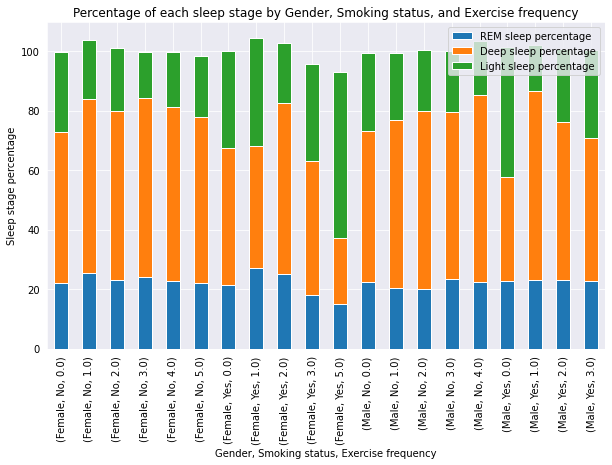

In [44]:
# Group the data by gender, smoking status, and exercise frequency
grouped = df.groupby(['Gender', 'Smoking status', 'Exercise frequency']).mean()[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']]

# Create stacked bar plots for each sleep stage
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
plt.xlabel('Gender, Smoking status, Exercise frequency')
plt.ylabel('Sleep stage percentage')
plt.title('Percentage of each sleep stage by Gender, Smoking status, and Exercise frequency')

# Show the plot
plt.show()

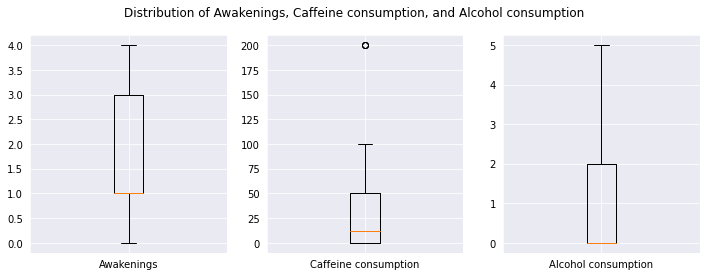

In [50]:
# Boxplot for Awakenings, Caffeine consumption, and Alcohol consumption
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].boxplot(df['Awakenings'], labels=['Awakenings'])
axs[1].boxplot(df['Caffeine consumption'], labels=['Caffeine consumption'])
axs[2].boxplot(df['Alcohol consumption'], labels=['Alcohol consumption'])
fig.suptitle('Distribution of Awakenings, Caffeine consumption, and Alcohol consumption')
plt.show()